In [ ]:
# import sklearn
# import imblearn

# print("sklearn version:", sklearn.__version__)
# print("imblearn version:", imblearn.__version__)

# from imblearn.over_sampling import SMOTE
# print("SMOTE imported successfully!")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,callbacks

In [ ]:
file_paths = {
    "coffee": "/content/hot_coffee_office.csv",
    "air_office": "/content/normal_air_office.csv",
    "air_pantry": "/content/normal_air_pantry.csv",
    "perfume_office": "/content/perfume_office.csv",
    "perfume_pantry": "/content/perfume_pantry.csv",
    "tea_office": "/content/tea_office.csv",
    "tea_pantry": "/content/tea_pantry.csv",
    "vinegar_office": "/content/vinegar_office.csv",
    "vinegar_pantry": "/content/vinegar_pantry.csv",
}
dfs = []
for label, path in file_paths.items():
    df = pd.read_csv(path)
    df['label'] = label
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)



In [ ]:
df_all = df_all.drop(columns = ['label'])
df_all= df_all.drop(columns = ['Location'])


In [ ]:
# Remove timestamp
if 'Timestamp' in df_all.columns:
    df_all = df_all.drop(columns=['Timestamp'])

# Separate features and labels
X = df_all.drop(columns=['Label'])
y = df_all['Label']

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)


In [ ]:
print(f"Original X shape: {X.shape}, y shape: {y.shape}")
print("Original Class Distribution:")
print(pd.Series(y).value_counts())


Original X shape: (1939, 6), y shape: (1939,)
Original Class Distribution:
Label
vinegar     498
perfume     492
tea         470
air         368
coffee      111
Name: count, dtype: int64



Shape after SMOTE: (2490, 7)
Class Distribution after SMOTE (before final 250 sample limit):
Label
coffee      498
air         498
perfume     498
tea         498
vinegar     498
Name: count, dtype: int64


<ipython-input-21-aa5c2e3a933f>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final = df_balanced.groupby('Label', group_keys=False).apply(lambda x: x.sample(target_samples_per_class, random_state=42)).reset_index(drop=True)


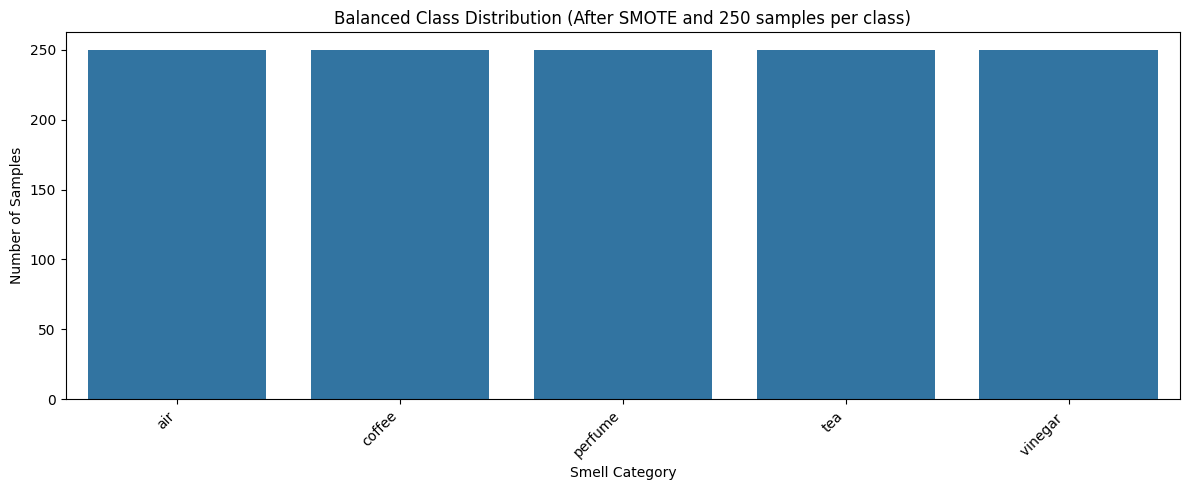

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_enc)

# Convert resampled data back to a DataFrame for easier manipulation
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Label'] = le.inverse_transform(y_resampled)

print(f"\nShape after SMOTE: {df_balanced.shape}")
print("Class Distribution after SMOTE (before final 250 sample limit):")
print(df_balanced['Label'].value_counts())


target_samples_per_class = 250
df_final = df_balanced.groupby('Label', group_keys=False).apply(lambda x: x.sample(target_samples_per_class, random_state=42)).reset_index(drop=True)

# Separate features and labels from the FINAL balanced and sampled DataFrame
X_final = df_final.drop(columns=['Label'])
y_final = df_final['Label'] # Keep as original string labels for visualization
y_final_enc = le.transform(y_final) # Re-encode to numerical for model training


# Visualize class distribution after SMOTE and final sampling
plt.figure(figsize=(12, 5))
sns.countplot(data=df_final, x='Label')
plt.xticks(rotation=45, ha='right')
plt.title(f"Balanced Class Distribution (After SMOTE and {target_samples_per_class} samples per class)")
plt.xlabel("Smell Category")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

In [ ]:
# df_final = df_balanced.drop(columns = ['Location'])
df_final


,Humidity,Temperature,NO2,Ethanol,VOC,CO,Label
0,50.4,25.810278,240,408,243,84,air
1,50.4,25.900000,240,409,243,84,air
2,55.9,26.800000,276,431,260,91,air
3,56.8,25.500000,270,425,254,88,air
4,56.0,26.800000,273,424,258,90,air
...,...,...,...,...,...,...,...
1245,52.3,27.500000,385,597,356,103,vinegar
1246,52.6,27.200000,421,623,392,120,vinegar
1247,55.2,25.000000,234,401,235,89,vinegar
1248,53.8,27.300000,427,623,419,95,vinegar


In [ ]:
class_counts = df_final['Label'].value_counts()
print("Samples per class:\n")
print(class_counts)



Samples per class:

Label
air         250
coffee      250
perfume     250
tea         250
vinegar     250
Name: count, dtype: int64


In [ ]:
print(f"\nFinal dataset shape before train-test split: {X_final.shape}")
print(f"Final Samples per class (Target: {target_samples_per_class}):")
print(pd.Series(y_final).value_counts())


Final dataset shape before train-test split: (1250, 6)
Final Samples per class (Target: 250):
Label
air         250
coffee      250
perfume     250
tea         250
vinegar     250
Name: count, dtype: int64


In [ ]:
# Train-test split on the FINAL balanced and sampled dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final_enc, test_size=0.2, random_state=42, stratify=y_final_enc
)

# Now ready for model training
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")
print("Train Class Distribution:")
print(pd.Series(le.inverse_transform(y_train)).value_counts())
print("Test Class Distribution:")
print(pd.Series(le.inverse_transform(y_test)).value_counts())



Train size: (1000, 6), Test size: (250, 6)
Train Class Distribution:
tea         200
perfume     200
vinegar     200
air         200
coffee      200
Name: count, dtype: int64
Test Class Distribution:
coffee      50
tea         50
air         50
vinegar     50
perfume     50
Name: count, dtype: int64


In [ ]:
X_test


,Humidity,Temperature,NO2,Ethanol,VOC,CO
427,94.516622,31.883378,436,682,412,118
946,82.700000,31.000000,393,605,376,123
297,95.400000,30.800000,442,697,431,126
21,57.600000,27.100000,278,423,256,91
410,94.427020,28.854349,427,701,431,128
...,...,...,...,...,...,...
670,53.800000,26.000000,482,712,587,144
564,85.500000,27.500000,607,825,633,253
566,54.400000,27.500000,521,724,496,126
1093,53.300000,26.900000,435,633,403,126


In [ ]:
num_classes = len(np.unique(y_final_enc))
input_shape = X_train.shape[1]


In [ ]:
#model
model = keras.Sequential([
    layers.InputLayer(input_shape=(input_shape,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # use sparse_categorical_crossentropy because labels are integer encoded
    metrics=['accuracy']
)


# Summary of the model
model.summary()


# # Setup early stopping to avoid overfitting
# early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,397 (44.52 KB)

 Trainable params: 11,397 (44.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model
print("\n--- Model Training Started ---")
history = model.fit(
    X_train, y_train,
    validation_split=0.2, # 20% of the X_train will be used for validation
    epochs=100,
    batch_size=32,
    verbose=2 # Show one line per epoch
)
print("--- Model Training Finished ---")



--- Model Training Started ---
Epoch 1/100
25/25 - 3s - 122ms/step - accuracy: 0.1875 - loss: 32.1695 - val_accuracy: 0.3600 - val_loss: 2.3926
Epoch 2/100
25/25 - 0s - 10ms/step - accuracy: 0.3363 - loss: 2.1865 - val_accuracy: 0.4000 - val_loss: 1.6519
Epoch 3/100
25/25 - 0s - 9ms/step - accuracy: 0.3500 - loss: 1.7030 - val_accuracy: 0.3350 - val_loss: 1.6238
Epoch 4/100
25/25 - 0s - 13ms/step - accuracy: 0.4062 - loss: 1.5260 - val_accuracy: 0.3800 - val_loss: 1.6235
Epoch 5/100
25/25 - 0s - 8ms/step - accuracy: 0.4350 - loss: 1.5223 - val_accuracy: 0.3250 - val_loss: 1.5792
Epoch 6/100
25/25 - 0s - 16ms/step - accuracy: 0.4387 - loss: 1.4734 - val_accuracy: 0.3400 - val_loss: 1.3132
Epoch 7/100
25/25 - 0s - 20ms/step - accuracy: 0.4888 - loss: 1.1940 - val_accuracy: 0.5100 - val_loss: 1.1985
Epoch 8/100
25/25 - 0s - 11ms/step - accuracy: 0.5525 - loss: 1.1301 - val_accuracy: 0.4550 - val_loss: 1.0856
Epoch 9/100
25/25 - 0s - 7ms/step - accuracy: 0.5075 - loss: 1.1613 - val_accura

In [ ]:

# --- Model Evaluation and Visualization of Training History ---

# Evaluate the model on the unseen test set
print("\n--- Evaluating Model on Test Set ---")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("--- Test Set Evaluation Complete ---")





--- Evaluating Model on Test Set ---
Test Loss: 0.2715
Test Accuracy: 0.9360
--- Test Set Evaluation Complete ---


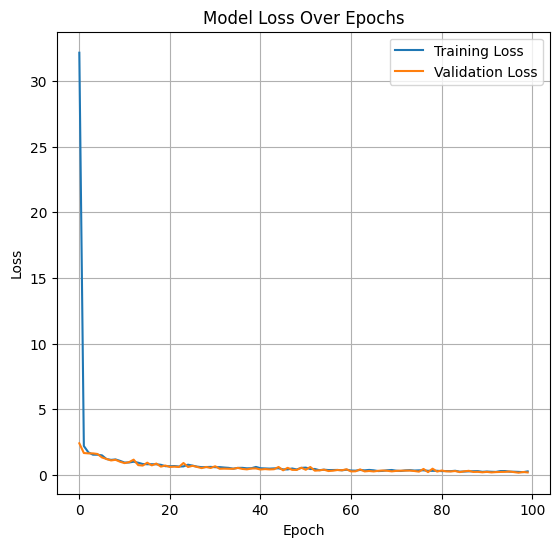

In [ ]:
# Plotting training and validation loss
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


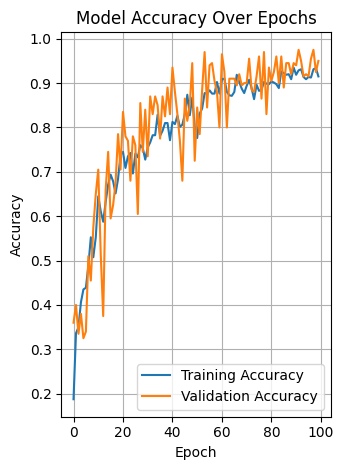

In [ ]:
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

--- Classification Report ---
              precision    recall  f1-score   support

         air       0.89      1.00      0.94        50
      coffee       0.98      1.00      0.99        50
     perfume       0.98      0.90      0.94        50
         tea       0.92      0.88      0.90        50
    vinegar        0.92      0.90      0.91        50

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250


--- Confusion Matrix ---


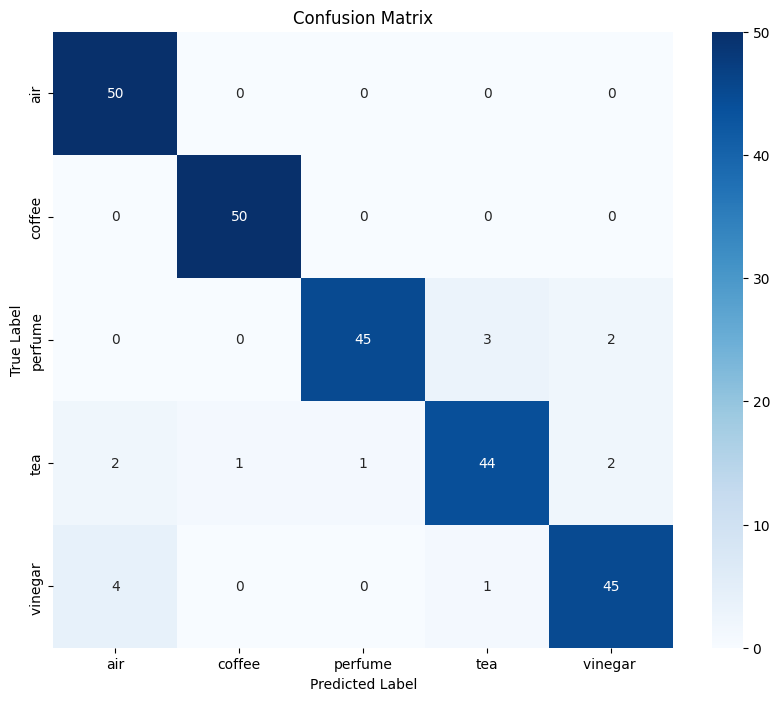

In [ ]:
# Further analysis: Classification Report and Confusion Matrix

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Assuming 'model' is your trained Keras model object from your previous successful run
model_save_path = './ai_nose_model.keras' # Add .keras extension
model.save(model_save_path)

print(f"Model saved successfully to: {model_save_path}")

Model saved successfully to: ./ai_nose_model.keras


In [ ]:
# Load the saved model
# Use the same path you used for saving
loaded_model_path = './ai_nose_model.keras' # Or './ai_nose_model' if you used the SavedModel format
loaded_model = tf.keras.models.load_model(loaded_model_path)

print("Model loaded successfully!")
loaded_model.summary() # Verify the loaded model

Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,193 (133.57 KB)

 Trainable params: 11,397 (44.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,796 (89.05 KB)

In [ ]:
model = tf.keras.models.load_model('./ai_nose_model.keras')
# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# This is highly recommended for microcontrollers to reduce model size and improve inference speed.
converter.optimizations = [tf.lite.Optimize.DEFAULT]



In [ ]:
# For integer quantization, you might need a representative dataset if your model has float inputs
# If your input data is already integer-based or you don't need full integer quantization,
# you can skip the representative_dataset part.
# If your model's input expects float32, and you want full integer quantization (int8),
# you'll need to provide a representative dataset for calibration.
# Assuming X_train is available from your previous script:
def representative_dataset_gen():
    # Provide a small representative dataset for quantization
    # Make sure this data is preprocessed in the same way as your model's input
    for input_value in X_train.sample(100).values.astype(np.float32): # Sample 100 examples
        yield [input_value]

# If you want full integer quantization (input/output also int8), uncomment this:
# converter.representative_dataset = representative_dataset_gen
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.int8
# converter.inference_output_type = tf.int8


tflite_model = converter.convert()
# Save the TFLite model
with open('ai_nose_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TensorFlow Lite model saved to ai_nose_model.tflite")

# Convert the TFLite model to a C array
import os
os.system("xxd -i ai_nose_model.tflite > ai_nose_model.h")
print("TensorFlow Lite model converted to C array and saved to ai_nose_model.h")


Saved artifact at '/tmp/tmp873l63nh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  133975645772432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133975645772816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133975645773008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133975645774160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133975645774544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133975645773584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133975645774352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133975643849360: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite model saved to ai_nose_model.tflite
TensorFlow Lite model converted to C array and saved to ai_nose_model.h
